In [1]:
# Code borrowed from Alexis Goujon https://https://github.com/axgoujon/convex_ridge_regularizers
import torch
import matplotlib.pyplot as plt
from quadratic_spline_rev import quadratic_spline

In [2]:
n_ch = 2
n_knots = 21
knots_range = 1

In [4]:
qs = quadratic_spline(n_ch, n_knots, knots_range)

qs.coefficients.normal_(0,1)

Espacement des nœuds (grid step) : 0.10000000149011612


tensor([[-0.0961, -0.6812,  0.2366, -0.4091,  0.9020, -0.5316,  0.2305,  0.9496,
         -1.5601,  0.0317, -1.2651,  0.9958, -0.2885, -0.3573, -0.7501,  0.2345,
          1.4043,  0.8117, -1.4149, -1.0545,  0.5431],
        [ 0.0646, -0.3062,  0.3659, -0.2136, -0.0264, -0.2700,  0.0846, -1.0553,
          0.4938,  0.1042, -0.2857,  1.8413, -1.7427, -0.7400, -0.0612, -1.0655,
          0.8021, -0.4554,  0.3668, -0.6459, -0.5049]])

Text(0.5, 1.0, 'Difference')

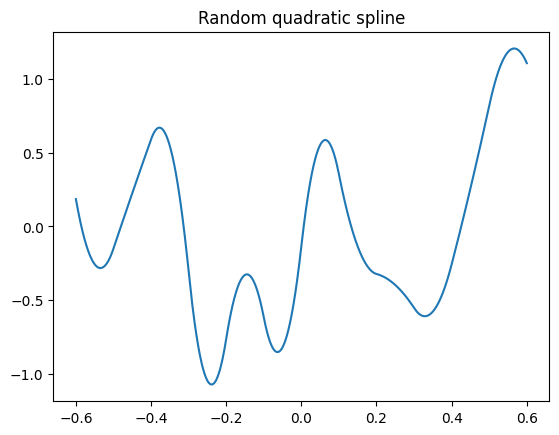

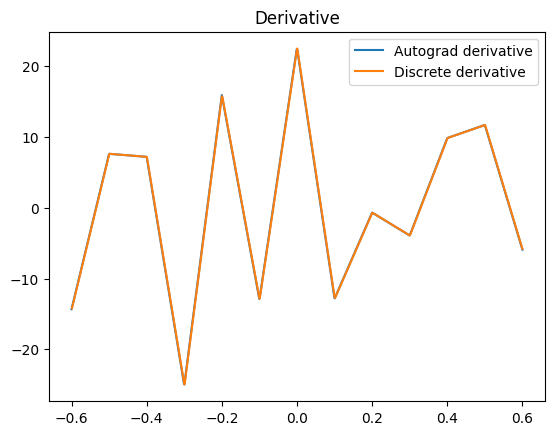

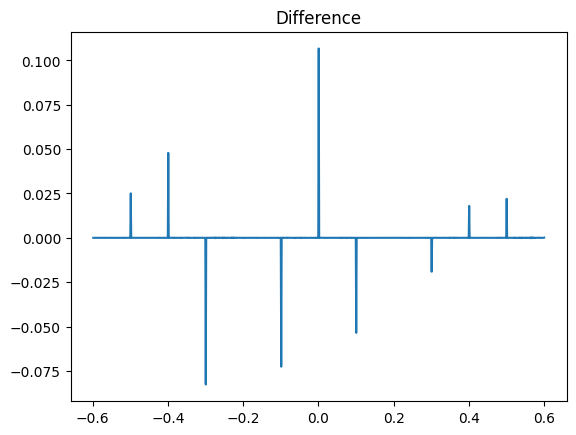

In [6]:
xmin = -0.6
xmax = 0.6
x = torch.linspace(xmin ,xmax,1000).view(-1, 1, 1, 1).expand(-1, n_ch, -1, -1)
x.requires_grad = True
y = qs(x)

plt.figure()
plt.plot(x[:, 0, 0, 0].detach().numpy(), y[:, 0, 0, 0].detach().numpy())
plt.title('Random quadratic spline')

dydx = torch.autograd.grad(y.sum(), x, create_graph=False)[0]
plt.figure()
plt.plot(x[:, 0, 0, 0].detach().numpy(), dydx[:, 0, 0, 0].detach().numpy(), label='Autograd derivative')
plt.title('Derivative')


dydx_discrete = y[:, 0, 0, 0].diff() / x[:, 0, 0, 0].diff()

plt.plot(x[1:, 0, 0, 0].detach().numpy(), dydx_discrete.detach().numpy(), label='Discrete derivative')

plt.legend()

plt.figure()
plt.plot(x[1:, 0, 0, 0].detach().numpy(), dydx_discrete.detach().numpy() - 0.5*(dydx[:-1, 0, 0, 0].detach().numpy() + dydx[1:, 0, 0, 0].detach().numpy()))
plt.title('Difference')